In [19]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [20]:
#Gathering Data
Credit = pd.read_csv("/Users/sktangihanoshin/Desktop/netflow_day-02.csv",sep=",",index_col=False, nrows = 1000)

In [22]:
#First 5 Rows of Data
Credit.head()

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [25]:
#Selecting Numeric Fields To Be Used In Modelling
X = Credit[[' srcPackets',' dstPackets',' srcBytes',' dstBytes']]

In [26]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [27]:
#Assining Column Names
X_normalized.columns = [' srcPackets',' dstPackets',' srcBytes',' dstBytes']

In [28]:
#Implementing Algorithm
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [29]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [30]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [31]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,101
1,899


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10eec48d0>,
      dtype=object)

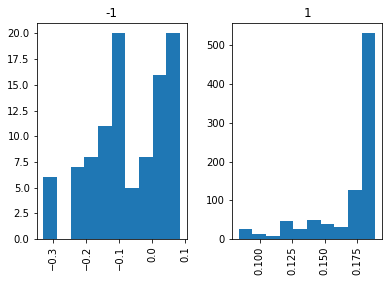

In [32]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [33]:
#Descriptive Statistics
X['Anomaly_Score'].describe()

count    1000.000000
mean        0.145177
std         0.084058
min        -0.330223
25%         0.142700
50%         0.180031
75%         0.185435
max         0.189177
Name: Anomaly_Score, dtype: float64

In [34]:
#Implementing Algorithm With Different Parameters
#contamination: Proportion of outliers in the data set
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [35]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [36]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [37]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()

,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,205
1,795


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115716fd0>,
      dtype=object)

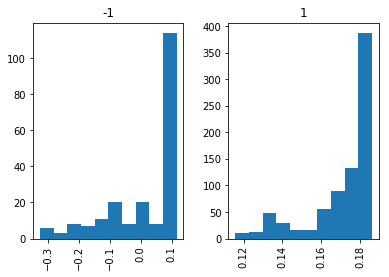

In [38]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])

In [39]:
#Descriptive Statistics
X['Anomaly_Score_Contamination'].describe()

count    1000.000000
mean        0.138998
std         0.084480
min        -0.326859
25%         0.131832
50%         0.173504
75%         0.182528
max         0.186021
Name: Anomaly_Score_Contamination, dtype: float64

In [40]:
#Implementing Algorithm With Different Parameters
#bootstrap: If True, individual trees are fit on random subsets of the training data sampled with replacement.
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [41]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [42]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [43]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()

,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,101
1,899


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1158014e0>,
      dtype=object)

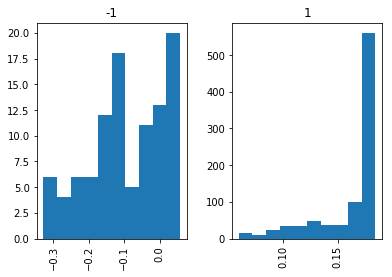

In [44]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])

In [45]:
#Original Data Set With New Variables
X.head()

,srcPackets,dstPackets,srcBytes,dstBytes,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,0,755065,0,1042329018,-1,0.000596,-1,-0.035967,-1,-0.043602
1,1665,1108,300810,250408,1,0.186378,1,0.183755,1,0.182367
2,1866,0,1477041,0,1,0.187062,1,0.183201,1,0.182992
3,3326,0,2656305,0,1,0.186635,1,0.181413,1,0.180268
4,5423,0,4388449,0,1,0.183903,1,0.176411,1,0.180431


In [46]:
#Top 5 Anomaly Records
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,-0.035967,-0.043602,0.000596
4,0.176411,0.180431,0.183903
3,0.181413,0.180268,0.186635
2,0.183201,0.182992,0.187062
1,0.183755,0.182367,0.186378
